## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Reading CSV file

In [2]:
data=pd.read_csv("/content/student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data exploration

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.isnull().describe()

,Hours,Scores
count,25,25
unique,1,1
top,False,False
freq,25,25


## Data Visualization

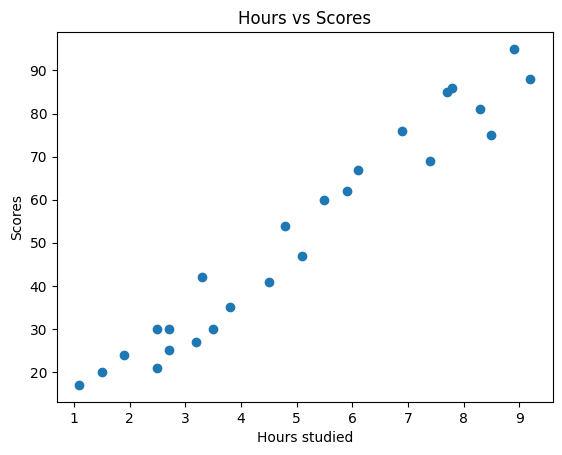

In [5]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

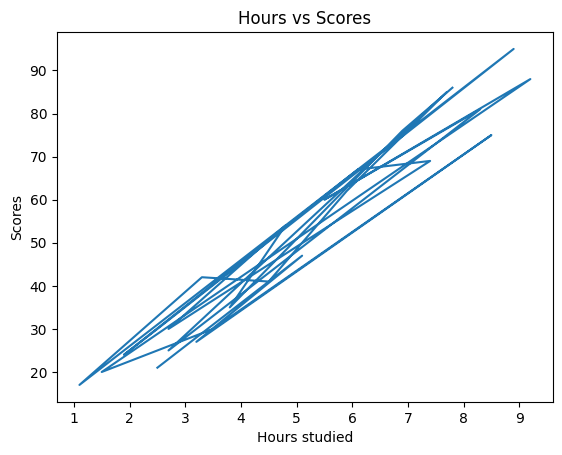

In [6]:
plt.plot(data['Hours'], data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

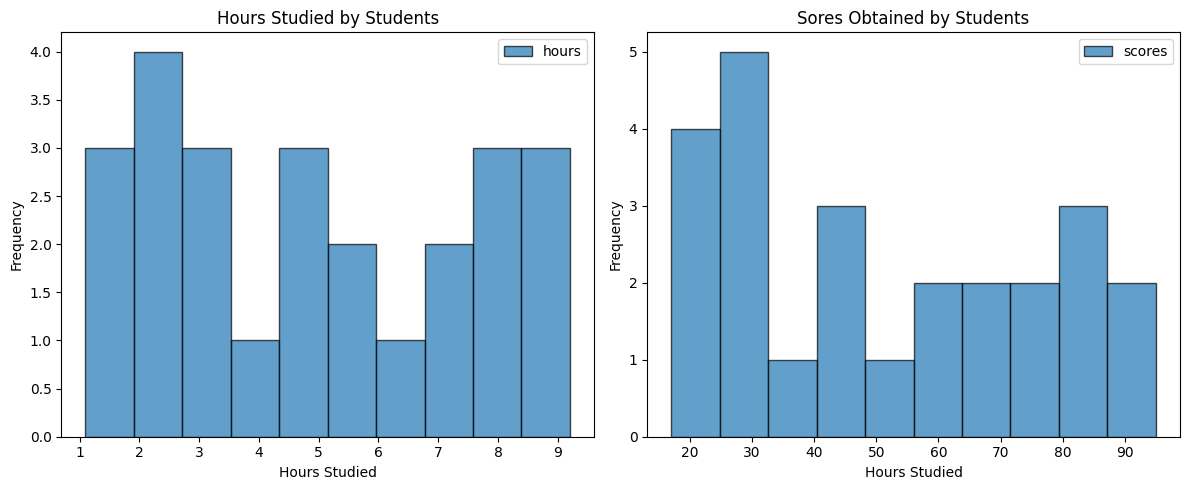

In [7]:
Hours = data['Hours']
Scores = data['Scores']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(Hours, bins=10, edgecolor='black', alpha=0.7, label='hours')
axs[0].set_xlabel('Hours Studied')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Hours Studied by Students')
axs[0].legend()

axs[1].hist(Scores, bins=10, edgecolor='black', alpha=0.7, label='scores')
axs[1].set_xlabel('Scores Obtained')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Sores Obtained by Students')
axs[1].legend()

plt.tight_layout()

plt.show()



## Heat Map

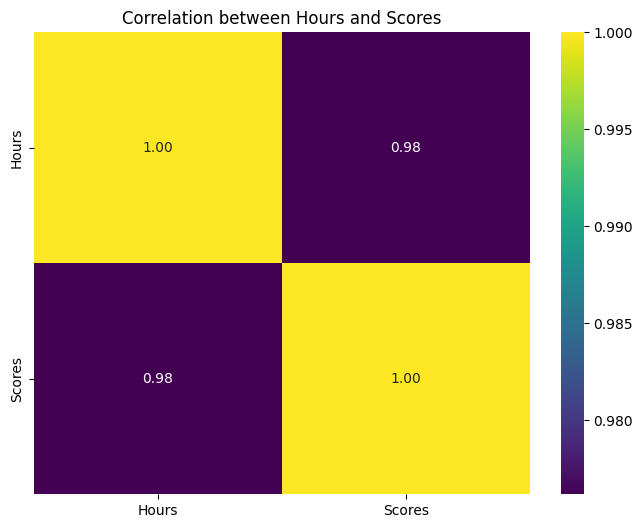

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation between Hours and Scores')
plt.show()

## **Train and Testing the model**

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [17]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [16]:
threshold_mae = 10
threshold_mse = 100
threshold_rmse = 10

if mae > threshold_mae:
    print('Model has poor performance based on Mean Absolute Error.')
else:
    print('Model has acceptable performance based on Mean Absolute Error.')

if mse > threshold_mse:
    print('Model has poor performance based on Mean Squared Error.')
else:
    print('Model has acceptable performance based on Mean Squared Error.')

if rmse > threshold_rmse:
    print('Model has poor performance based on Root Mean Squared Error.')
else:
    print('Model has acceptable performance based on Root Mean Squared Error.')


Model has acceptable performance based on Mean Absolute Error.
Model has acceptable performance based on Mean Squared Error.
Model has acceptable performance based on Root Mean Squared Error.


In [15]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print("Predicted score for {} hours/day: {:.2f}".format(hours, predicted_score[0]))

Predicted score for 9.25 hours/day: 93.69
